In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data
# download and read data from excel file
data_root = "/home/jovyan/delaney-processed.csv"
delaney = pd.read_csv(data_root)

In [3]:
# check first five rows of data
delaney.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [4]:
# get quick description of data
delaney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Compound ID                                      1128 non-null   object 
 1   ESOL predicted log solubility in mols per litre  1128 non-null   float64
 2   Minimum Degree                                   1128 non-null   int64  
 3   Molecular Weight                                 1128 non-null   float64
 4   Number of H-Bond Donors                          1128 non-null   int64  
 5   Number of Rings                                  1128 non-null   int64  
 6   Number of Rotatable Bonds                        1128 non-null   int64  
 7   Polar Surface Area                               1128 non-null   float64
 8   measured log solubility in mols per litre        1128 non-null   float64
 9   smiles                        

In [5]:
delaney.describe()

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,-2.988192,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,1.683220,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,-9.702000,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,-3.948250,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,-2.870000,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,-1.843750,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,1.091000,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


### Since there are no missing data, we do not need to use sklearn's imputer() function.

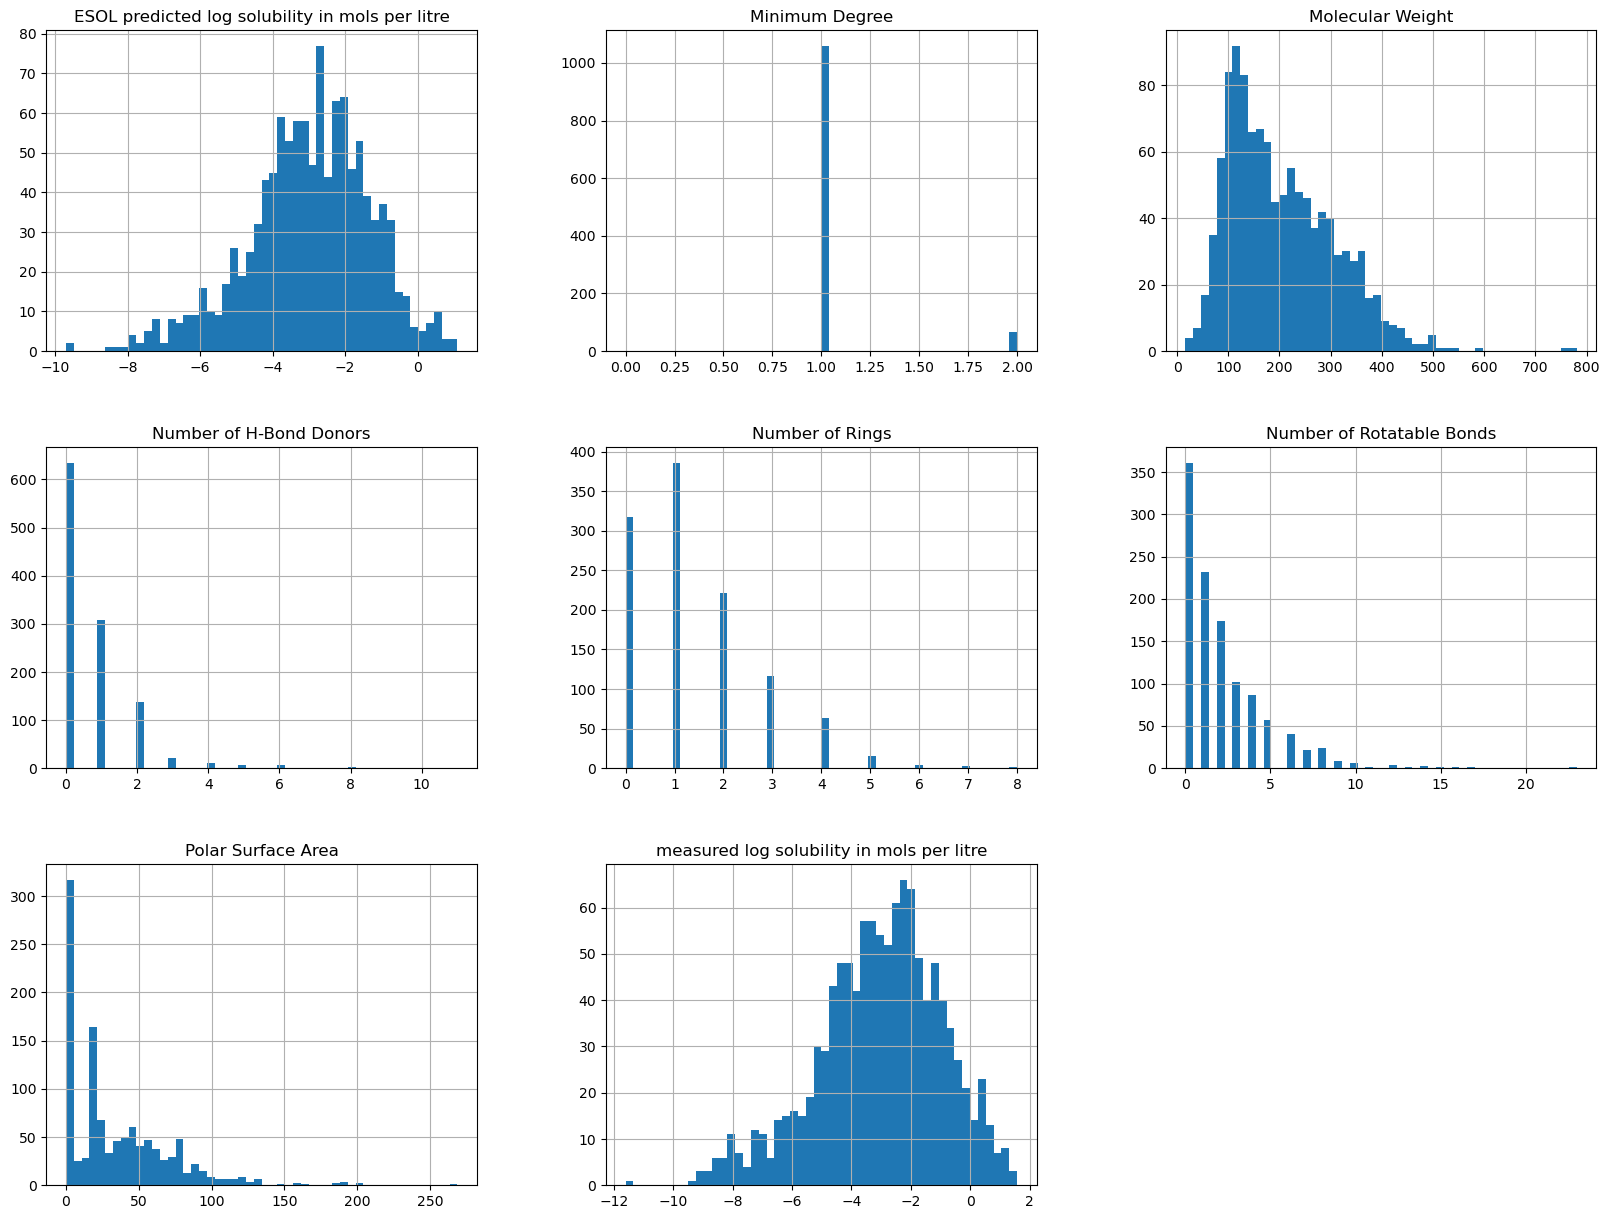

In [6]:
# plot histogram for each numerical attribute
delaney.hist(bins=50, figsize=(20,15))
plt.show()

# Data Splitting: 80% training set, 20% equally split into validation and test sets.

In [7]:
# set random seed to 23
np.random.seed(23)

In [8]:
# data splitting: 80% training set, 20% is randomly split into validation and test sets
from sklearn.model_selection import train_test_split
train_set, temp_set = train_test_split(delaney, test_size=0.2, random_state=23)
test_set, val_set = train_test_split(temp_set, test_size=0.5, random_state=23)

# check the size of each set
print("Training set size: ", len(train_set))
print("Validation set size: ", len(val_set))
print("Test set size: ", len(test_set))

Training set size:  902
Validation set size:  113
Test set size:  113


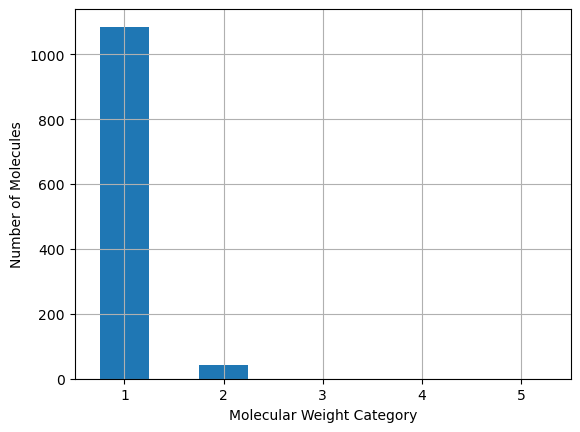

In [9]:
delaney["MW_cat"] = pd.cut(delaney["Molecular Weight"],
                            bins=[0., 400., 800., 1200., 1600., 2000.],
                            labels=[1, 2, 3, 4, 5])

delaney["MW_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Molecular Weight Category")
plt.ylabel("Number of Molecules")
plt.show()

In [10]:
# look for correlations between attributes
corr_matrix = train_set.corr()
corr_matrix["ESOL predicted log solubility in mols per litre"].sort_values(ascending=False)

/tmp/ipykernel_210/2908413057.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set.corr()


ESOL predicted log solubility in mols per litre    1.000000
measured log solubility in mols per litre          0.911158
Number of H-Bond Donors                            0.261732
Polar Surface Area                                 0.181046
Minimum Degree                                    -0.122905
Number of Rotatable Bonds                         -0.251367
Number of Rings                                   -0.497365
Molecular Weight                                  -0.683808
Name: ESOL predicted log solubility in mols per litre, dtype: float64

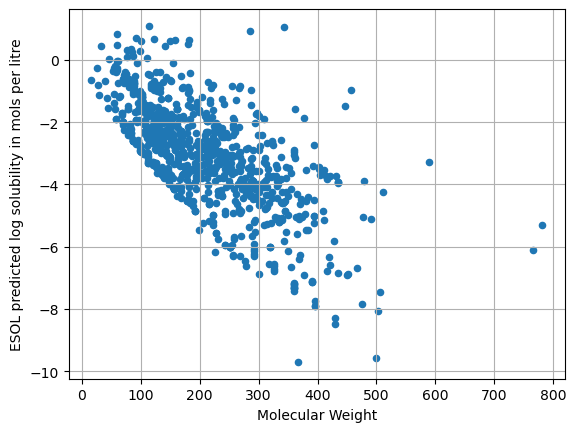

In [11]:
# plot best correlation attribute
train_set.plot(kind="scatter", x="Molecular Weight", y="ESOL predicted log solubility in mols per litre", alpha=1, grid=True)
plt.show()

# Correlation Findings:
## Molecular Weight correlates the best with log solubility. Therefore, the most promising attribute to predict solubility would be the molecular weight.

# Prepare data for Machine Learning algorithms

In [12]:
# prepare data for ML algorithms
# create a copy of training set
delaney = train_set.drop("ESOL predicted log solubility in mols per litre", axis=1)
delaney_labels = train_set["ESOL predicted log solubility in mols per litre"].copy()

# handle text attributes (smiles, Compound ID) to data using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_attribs = ["smiles", "Compound ID"]
cat_encoder = OneHotEncoder()
delaney_cat_1hot = cat_encoder.fit_transform(delaney[cat_attribs])
delaney_cat_1hot

<902x1804 sparse matrix of type '<class 'numpy.float64'>'
	with 1804 stored elements in Compressed Sparse Row format>

In [13]:
# feature scaling: handle numerical attributes by min-max scaling
from sklearn.preprocessing import MinMaxScaler

num_attribs = list(delaney)
num_attribs.remove("smiles")
num_attribs.remove("Compound ID")

scaler = MinMaxScaler()
delaney_num_minmax = scaler.fit_transform(delaney[num_attribs])
delaney_num_minmax

array([[0.5       , 0.43972331, 0.125     , ..., 0.26086957, 0.37284546,
        0.49537178],
       [0.5       , 0.27596724, 0.        , ..., 0.13043478, 0.63734857,
        0.63581184],
       [0.5       , 0.45994802, 0.        , ..., 0.30434783, 0.19092879,
        0.54385432],
       ...,
       [0.5       , 0.3546841 , 0.125     , ..., 0.34782609, 0.31828031,
        0.96691958],
       [0.5       , 0.27142682, 0.125     , ..., 0.08695652, 0.18876194,
        0.68156297],
       [0.5       , 0.1191166 , 0.125     , ..., 0.        , 0.12813947,
        0.7124431 ]])

In [14]:
# combine numerical and categorical attributes
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", MinMaxScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

delaney_prepared = full_pipeline.fit_transform(delaney)
delaney_prepared.shape

(902, 1811)

In [15]:
# train linear regression model based on the resulting min-max scaled data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(delaney_prepared, delaney_labels)

# print predictions for the first 5 instances
predictions = lin_reg.predict(delaney_prepared)
print("Predictions: ", predictions[:5])

# print actual values for the first 5 instances
print("Actual Values: ", list(delaney_labels[:5]))

# check the performance of the model on the training set
from sklearn.metrics import mean_squared_error

delaney_predictions = lin_reg.predict(delaney_prepared)
lin_mse = mean_squared_error(delaney_labels, delaney_predictions)
lin_rmse = np.sqrt(lin_mse)

print("Linear Regression RMSE: ", lin_rmse)
print("Linear Regression MSE: ", lin_mse)

Predictions:  [-3.469 -2.606 -5.106 -5.915 -4.079]
Actual Values:  [-3.469, -2.606, -5.106, -5.915, -4.079]
Linear Regression RMSE:  1.1422649313342427e-11
Linear Regression MSE:  1.304769173356022e-22


/tmp/ipykernel_210/3416203279.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("Actual Values: ", list(delaney_labels[:5]))


In [16]:
# cross-validate the model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, delaney_prepared, delaney_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [0.52786926 0.41048078 0.55590212 0.54766008 0.623646   0.50842872
 0.53190479 0.6178174  0.44037315 0.55250605]
Mean: 0.5316588354544912
Standard deviation: 0.06382364645810101


In [17]:
# train a decision tree regressor based on the resulting min-max scaled data
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(delaney_prepared, delaney_labels)

# print predictions for the first 5 instances
delaney_predictions = tree_reg.predict(delaney_prepared)
print("Predictions: ", delaney_predictions[:5])

# print actual values for the first 5 instances
print("Actual Values: ", list(delaney_labels[:5]))

# check the performance of the model on the training set
delaney_predictions = tree_reg.predict(delaney_prepared)
tree_mse = mean_squared_error(delaney_labels, delaney_predictions)
tree_rmse = np.sqrt(tree_mse)

print("Decision Tree RMSE: ", tree_rmse)
print("Decision Tree MSE: ", tree_mse)

Predictions:  [-3.469 -2.606 -5.106 -5.915 -4.079]
Actual Values:  [-3.469, -2.606, -5.106, -5.915, -4.079]
Decision Tree RMSE:  0.0
Decision Tree MSE:  0.0


/tmp/ipykernel_210/1625516080.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("Actual Values: ", list(delaney_labels[:5]))


In [18]:
# cross-validate the model
scores = cross_val_score(tree_reg, delaney_prepared, delaney_labels,
                            scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [0.73570286 0.51921362 0.58274746 0.65865741 0.70082267 0.4996322
 0.59081926 0.63897567 0.65389647 0.72372229]
Mean: 0.6304189902922994
Standard deviation: 0.07712407411608746


In [19]:
# train a random forest regressor based on the resulting min-max scaled data
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(delaney_prepared, delaney_labels)

# print predictions for the first 5 instances
delaney_predictions = forest_reg.predict(delaney_prepared)
print("Predictions: ", delaney_predictions[:5])

# print actual values for the first 5 instances
print("Actual Values: ", list(delaney_labels[:5]))

# check the performance of the model on the training set
delaney_predictions = forest_reg.predict(delaney_prepared)
forest_mse = mean_squared_error(delaney_labels, delaney_predictions)
forest_rmse = np.sqrt(forest_mse)

print("Random Forest RMSE: ", forest_rmse)
print("Random Forest MSE: ", forest_mse)

Predictions:  [-3.79564 -2.44836 -4.95756 -6.05053 -4.06155]
Actual Values:  [-3.469, -2.606, -5.106, -5.915, -4.079]
Random Forest RMSE:  0.1853348264699885
Random Forest MSE:  0.03434899790266075


/tmp/ipykernel_210/2825447775.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("Actual Values: ", list(delaney_labels[:5]))


In [20]:
# cross-validate the model
scores = cross_val_score(forest_reg, delaney_prepared, delaney_labels,
                            scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [0.57272613 0.38764793 0.46682322 0.5620211  0.5885764  0.44229555
 0.48990359 0.57289997 0.45087559 0.51133215]
Mean: 0.5045101624771516
Standard deviation: 0.06464482193880045


In [21]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
